In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

In [3]:
df = pd.read_csv('vg_trend.csv')
df.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.36,28.96,3.77,8.45,82.53,76.0,51.0,8,322.0,Nintendo,E
1,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.68,12.76,3.79,3.29,35.52,82.0,73.0,8.3,709.0,Nintendo,E
3,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.61,10.93,3.28,2.95,32.77,80.0,73.0,8,192.0,Nintendo,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
df = df.sort_values('User_Count',
                    ascending=False).groupby('Developer').head(10)

data = df[df['Developer'].notnull()]

data.head()

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
2851,The Witcher 3: Wild Hunt,PC,2015.0,Role-Playing,Namco Bandai Games,0.21,0.46,0.00,0.05,0.72,93.0,32.0,9.3,10665.0,CD Projekt Red Studio,M
303,The Witcher 3: Wild Hunt,PS4,2015.0,Role-Playing,Namco Bandai Games,1.02,2.13,0.23,0.59,3.97,92.0,79.0,9.2,10179.0,CD Projekt Red Studio,M
11288,Counter-Strike: Source,PC,2004.0,Shooter,Vivendi Games,0.00,0.07,0.00,0.02,0.08,88.0,9.0,8.9,9851.0,Valve Software,M
192,Diablo III,PC,2012.0,Role-Playing,Activision,2.44,2.16,0.00,0.54,5.14,88.0,86.0,4,9629.0,Blizzard Entertainment,M
313,The Elder Scrolls V: Skyrim,PC,2011.0,Role-Playing,Bethesda Softworks,1.16,2.12,0.00,0.60,3.88,94.0,32.0,8.1,9073.0,Bethesda Game Studios,M


In [29]:
dendr = pd.DataFrame(data[['NA_Sales',
             'EU_Sales',
             'JP_Sales',
             'Other_Sales']])

dendr.head()

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
2851,0.21,0.46,0.00,0.05
303,1.02,2.13,0.23,0.59
11288,0.00,0.07,0.00,0.02
192,2.44,2.16,0.00,0.54
313,1.16,2.12,0.00,0.60


In [30]:
np.unique(data['Genre'], return_counts=True)

(array(['Action', 'Adventure', 'Fighting', 'Misc', 'Platform', 'Puzzle',
        'Racing', 'Role-Playing', 'Shooter', 'Simulation', 'Sports',
        'Strategy'], dtype=object),
 array([1344,  338,  245,  505,  324,  253,  546,  607,  769,  370,  595,
         274], dtype=int64))

In [31]:
from scipy.cluster.vq import whiten
scaled_data = whiten(dendr.to_numpy())

In [32]:
pd.DataFrame(scaled_data).describe()

,0,1,2,3
count,6170.000000,6170.000000,6170.000000,6170.000000
mean,0.451747,0.392804,0.225369,0.285236
std,1.000081,1.000081,1.000081,1.000081
min,0.000000,0.000000,0.000000,0.000000
25%,0.057345,0.020802,0.000000,0.000000
50%,0.157699,0.083209,0.000000,0.043105
75%,0.415751,0.332835,0.000000,0.215526
max,21.504351,18.909208,21.949341,45.562300


In [33]:
from scipy.cluster.hierarchy import fcluster, linkage
 
# Use the linkage() function
distance_matrix = linkage(scaled_data, method = 'ward', metric = 'euclidean')

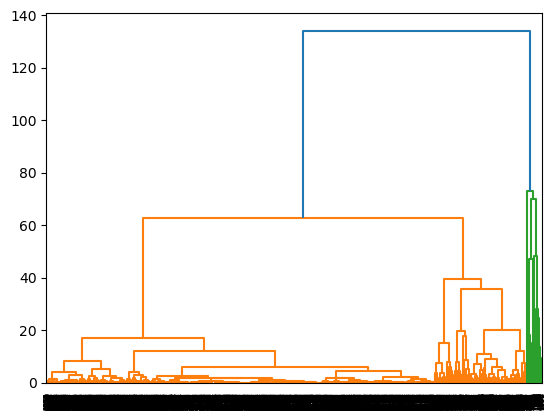

In [34]:
from scipy.cluster.hierarchy import dendrogram

dn = dendrogram(distance_matrix)
 

plt.show()